In [1]:
print("Akshat Jain")

Akshat Jain


# Step-1: Data Pre-processing
## 1. Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2. Importing the dataset using the pandas library

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Handling the missing values

In [6]:
print("Handling the missing values in dataset: ")
print(data.isnull().sum())

Handling the missing values in dataset: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Percent of missing "Age"
missing_age_percentage = (data['Age'].isnull().sum() / data.shape[0]) * 100

# printing the percentage
print('Percent of missing "Age" records is ', missing_age_percentage, "%")

Percent of missing "Age" records is  19.865319865319865 %


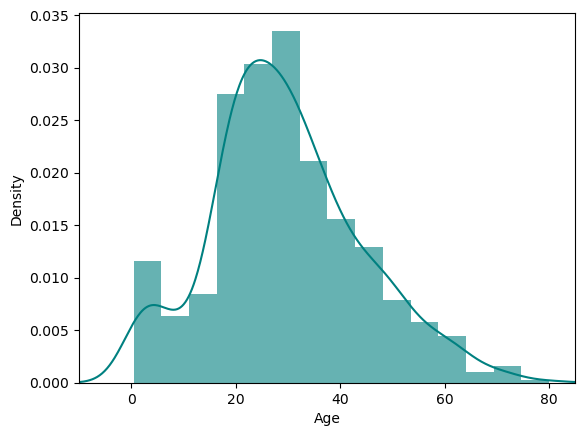

In [8]:
# Assuming you have a list or array containing the 'Age' data
age_data = data["Age"]

# Create a histogram
plt.hist(age_data, bins=15, density=True,
         stacked=True, color='teal', alpha=0.6)

# Create a kernel density plot
age_data.plot(kind='kde', color='teal')

# Set the x-axis label
plt.xlabel('Age')

# Set the x-axis limit
plt.xlim(-10, 85)

# Show the plot
plt.show()

### Here, we have seen from above graph it is right skewed so using mean should gives biased results so for this we use 'median'.

In [9]:
print('The mean of "Age" is ', (data["Age"].mean(skipna=True)))
print('The median of "Age" is ', (data["Age"].median(skipna=True)))

The mean of "Age" is  29.69911764705882
The median of "Age" is  28.0


In [10]:
print('Percent of missing "Cabin" records is ',((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is  77.10437710437711


In [11]:
print('Percent of missing "Embarked" records is ',((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is  0.22446689113355783


Boarded passengers grouped by port of embarkation
     (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\Adinath Hp\AppData\Local\Temp\ipykernel_33360\1747784939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=data, palette='Set2')


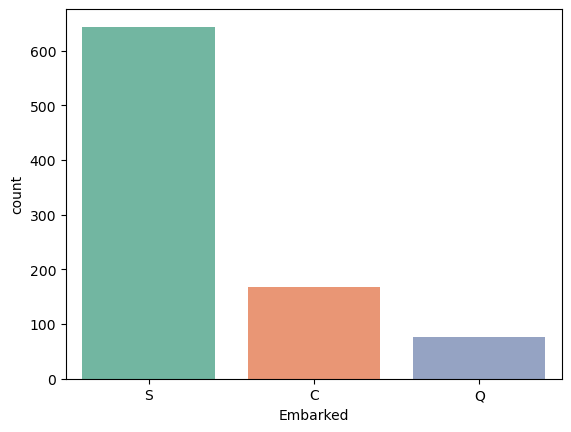

In [12]:
print('''Boarded passengers grouped by port of embarkation
     (C = Cherbourg, Q = Queenstown, S = Southampton):''')
print(data['Embarked'].value_counts())
     
# plotting graph
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

In [13]:
print('The most common boarding port of embarkation is ' , data['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is  S


In [14]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace = True)
data.drop('Cabin', axis =1, inplace=True)
data["Embarked"].fillna(data["Embarked"].value_counts().idxmax(), inplace=True)
data.isnull().sum()

C:\Users\Adinath Hp\AppData\Local\Temp\ipykernel_33360\3510366078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].value_counts().idxmax(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

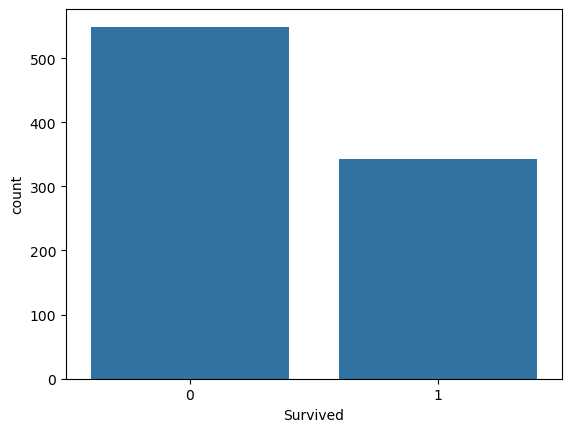

In [15]:
sns.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

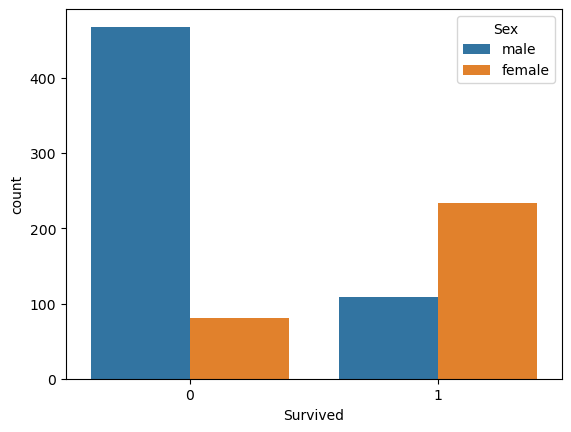

In [16]:
sns.countplot(x="Survived", hue="Sex", data=data)

<Axes: xlabel='Survived', ylabel='count'>

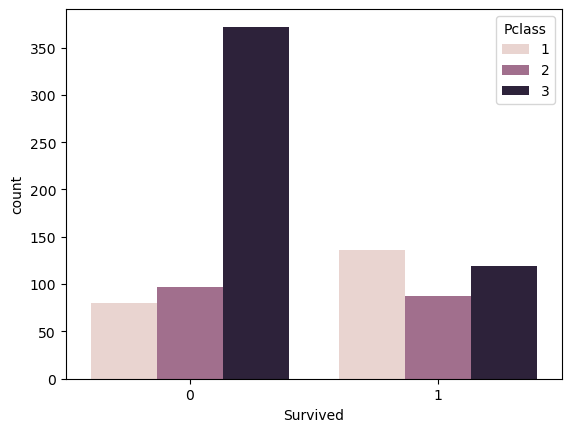

In [17]:
sns.countplot(x="Survived", hue="Pclass", data=data)

<Axes: ylabel='Frequency'>

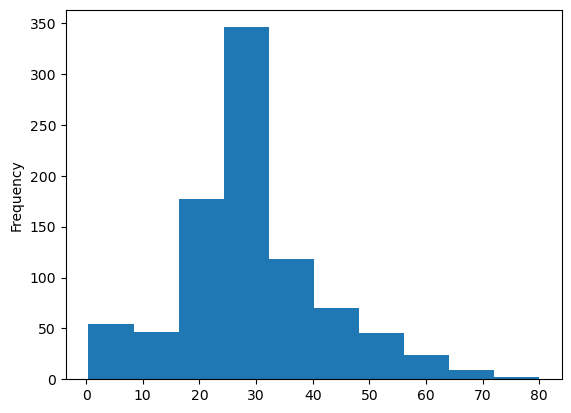

In [18]:
data["Age"].plot.hist()

# Step-2: Adjusting additional variables

In [19]:
data['TravelAlone'] = np.where((data["SibSp"] + data["Parch"]) > 0, 0, 1)
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


# Step-3: Creating dummy variables for 'Pclass', 'Sex', and 'Embarked'

In [20]:
data = pd.get_dummies(data, columns=["Pclass", "Embarked", "Sex"])
data.drop(['Sex_female', 'Pclass_3', 'Embarked_S',
           'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Step-4: Extracting independent and dependent variables

In [21]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# Step-5: Splitting the dataset into training and testing dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Step-6: Fitting Logistic Regression to the Training set

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train , y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Step-7: Predicting the Test Result

In [24]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

# Step-8: Test accuracy of the result

In [25]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.84      0.84       110\n           1       0.74      0.74      0.74        69\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [26]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[92, 18],
       [18, 51]])

# Step-9: Finding the accuracy of the model

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100, "%")

Accuracy:  79.88826815642457 %


# Hence, the accuracy of  the model is approximate 80%  